In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
df=pd.read_csv("Resume_CSV/final_resumes_dataset.csv")

In [3]:
df.head()

,Resume,Category
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday_resumes
1,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,workday_resumes
2,Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...,workday_resumes
3,Harikrishna Akula ...,workday_resumes
4,HIMA.MENDU\n\n\t \n\n\n\nCareer Objective\n\n...,workday_resumes


In [4]:
df.head()

,Resume,Category
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday_resumes
1,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,workday_resumes
2,Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...,workday_resumes
3,Harikrishna Akula ...,workday_resumes
4,HIMA.MENDU\n\n\t \n\n\n\nCareer Objective\n\n...,workday_resumes


In [5]:
df["Category"].value_counts()

react_resumes      24
workday_resumes    21
peoplesoft         20
SQL_Developer      14
Name: Category, dtype: int64

In [6]:
import re
import string
import nltk
from nltk.corpus import stopwords

In [7]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [8]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [8]:
stopwords = set(stopwords.words('english'))

In [9]:
def clean_resume_text(resume_text):
    """
    This function takes in a string of text (resume) as input and returns a cleaned version of the text.
    """
    # Convert to lowercase
    resume_text = resume_text.lower()
    
    # Remove numbers and special characters
    resume_text = re.sub('[^a-zA-Z]', ' ', resume_text)
    
    # Remove punctuation
    resume_text = resume_text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove extra whitespaces
    resume_text = ' '.join(resume_text.split())
    
    #removing word with 2 or 1 letter
    resume_text = ' '.join(word for word in resume_text.split() if len(word) > 2)
    
    # Remove stop words
    resume_text = ' '.join(word for word in resume_text.split() if word not in stopwords)
    
    return resume_text

In [10]:
df["clean_text"] = df["Resume"].apply(clean_resume_text)

In [11]:
df.head()

,Resume,Category,clean_text
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday_resumes,chinna subbarayudu dob march nationality india...
1,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,workday_resumes,name gopi krishna reddy professional summery w...
2,Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...,workday_resumes,hari krishna summary result oriented professio...
3,Harikrishna Akula ...,workday_resumes,harikrishna akula summary years experience aro...
4,HIMA.MENDU\n\n\t \n\n\n\nCareer Objective\n\n...,workday_resumes,hima mendu career objective continue growing k...


In [12]:
#Now we will try to find the most common word present in dataset column clean_text

In [13]:
import string

In [14]:
from collections import Counter

In [15]:
all_resume_text = ' '.join(df["clean_text"])

In [16]:
all_resume_text

'chinna subbarayudu dob march nationality indian profile summary around years experience developing implementation erp technology using workday hcm etl informatica technologies years experience workday integration consultant involved maintenance implementation experience phases workday like requirements gathering analysis design development testing hands experience inbound outbound integrations using core connector workday studio managing business processes working eib report writer developed maintained custom report types advanced matrix composite using report writer tool involved transformation xml xslt presenting data different web services building workday integration eib calculated fields custom reports writing xslt transformation code developed testing strategies validation scenarios along project scope requirement documents prioritizing reproducing verifying bug fixes different workday integrations knowledge xml soap web service rest web service experienced using tools soap xml 

In [17]:
all_words = all_resume_text.split()

In [18]:
word_counts = Counter(all_words)

In [19]:
top_words = word_counts.most_common(40)

In [20]:
# Print the result
print("The top 40 most common words are:")
for word, count in top_words:
    print("{}: {}".format(word, count))

The top 40 most common words are:
xff: 1531
experience: 598
peoplesoft: 453
workday: 431
application: 423
using: 390
server: 360
data: 332
reports: 326
project: 320
sql: 280
business: 274
web: 251
database: 243
process: 238
worked: 220
knowledge: 219
client: 193
system: 191
tools: 190
integrations: 189
involved: 188
integration: 183
hcm: 182
support: 179
like: 177
skills: 170
good: 169
development: 167
creating: 164
working: 163
team: 162
technical: 160
people: 160
report: 155
services: 155
design: 152
servers: 152
testing: 150
react: 150


In [21]:
''' xff: 50513
xfe: 5179
xfeoj: 2632
xbe: 2272
xed: 1877
xbf: 1723
xef: 1633
xfd: 1612
xea: 1581
xdd: 1525
xde: 1500
xba: 1423
xdc: 1421
xae: 1419
xdf: 1416
xec: 1411
xeb: 1395
xbb: 1357
xca: 1352
xaf: 1351
xac: 1334
xaa: 1301
xcf: 1289
xda: 1288
xcd: 1282
xab: 1278
xfb: 1267
xce: 1232
xbd: 1232
xdb: 1228
xcc: 1226
xbc: 1215
xfc: 1188
xfa: 1187
xee: 1155
xad: 1138
xcb: 1107'''
#we will remove these word are not relevent are noise in the dataset and these are most frequent

' xff: 50513\nxfe: 5179\nxfeoj: 2632\nxbe: 2272\nxed: 1877\nxbf: 1723\nxef: 1633\nxfd: 1612\nxea: 1581\nxdd: 1525\nxde: 1500\nxba: 1423\nxdc: 1421\nxae: 1419\nxdf: 1416\nxec: 1411\nxeb: 1395\nxbb: 1357\nxca: 1352\nxaf: 1351\nxac: 1334\nxaa: 1301\nxcf: 1289\nxda: 1288\nxcd: 1282\nxab: 1278\nxfb: 1267\nxce: 1232\nxbd: 1232\nxdb: 1228\nxcc: 1226\nxbc: 1215\nxfc: 1188\nxfa: 1187\nxee: 1155\nxad: 1138\nxcb: 1107'

In [22]:
 # Clean the text by removing short words and noise words
noise_words = ['xff', 'xfe', 'xfeoj', 'xbe', 'xed', 'xbf', 'xef', 'xfd', 'xea', 'xdd', 'xde', 'xba', 'xdc', 'xae', 'xdf', 'xec', 'xeb', 'xbb', 'xca', 'xaf', 'xac', 'xaa', 'xcf', 'xda', 'xcd', 'xab', 'xfb', 'xce',
                   'xbd', 'xdb', 'xcc', 'xbc', 'xfc', 'xfa', 'xee', 'xad', 'xcb']


In [23]:
df.head()

,Resume,Category,clean_text
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday_resumes,chinna subbarayudu dob march nationality india...
1,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,workday_resumes,name gopi krishna reddy professional summery w...
2,Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...,workday_resumes,hari krishna summary result oriented professio...
3,Harikrishna Akula ...,workday_resumes,harikrishna akula summary years experience aro...
4,HIMA.MENDU\n\n\t \n\n\n\nCareer Objective\n\n...,workday_resumes,hima mendu career objective continue growing k...


In [24]:
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'\b\w{{1,2}}\b|\b(?:{})\b'.format('|'.join(noise_words)), '', x))

In [25]:
df.head()

,Resume,Category,clean_text
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday_resumes,chinna subbarayudu dob march nationality india...
1,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,workday_resumes,name gopi krishna reddy professional summery w...
2,Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...,workday_resumes,hari krishna summary result oriented professio...
3,Harikrishna Akula ...,workday_resumes,harikrishna akula summary years experience aro...
4,HIMA.MENDU\n\n\t \n\n\n\nCareer Objective\n\n...,workday_resumes,hima mendu career objective continue growing k...


In [26]:
#Again we will try to see top most frequent word

In [27]:
all_resume_text = ' '.join(df["clean_text"])

In [28]:
all_words = all_resume_text.split()

In [29]:
word_counts = Counter(all_words)

In [30]:
top_words = word_counts.most_common(50)

In [31]:
# Print the result
print("The top 40 most common words are:")
for word, count in top_words:
    print("{}: {}".format(word, count))

The top 40 most common words are:
experience: 598
peoplesoft: 453
workday: 431
application: 423
using: 390
server: 360
data: 332
reports: 326
project: 320
sql: 280
business: 274
web: 251
database: 243
process: 238
worked: 220
knowledge: 219
client: 193
system: 191
tools: 190
integrations: 189
involved: 188
integration: 183
hcm: 182
support: 179
like: 177
skills: 170
good: 169
development: 167
creating: 164
working: 163
team: 162
technical: 160
people: 160
report: 155
services: 155
design: 152
servers: 152
testing: 150
react: 150
created: 149
responsibilities: 148
various: 146
oracle: 143
developer: 140
environment: 139
role: 136
management: 136
eib: 134
security: 134
production: 133


# Visualization 

In [32]:
import matplotlib.pyplot as plt

In [33]:
import seaborn as sns

In [34]:
top_words = dict(word_counts.most_common(10))

In [35]:
# create a dataframe from the dictionary
df_top_words = pd.DataFrame(list(top_words.items()), columns=['Word', 'Frequency'])


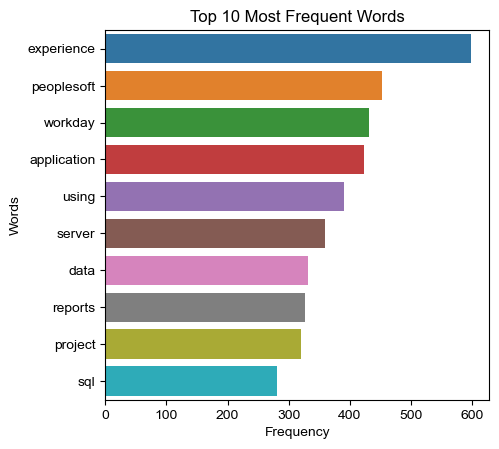

In [36]:
# create the bar plot
sns.barplot(x='Frequency', y='Word', data=df_top_words)

# set the title and axis labels
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')

# adjust the gap between bars
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("whitegrid")
plt.subplots_adjust(left=0.3)
plt.show()

In [37]:
#creating the wordcloud

In [38]:
from wordcloud import WordCloud

In [39]:
#using all combined text--> all_resume_text

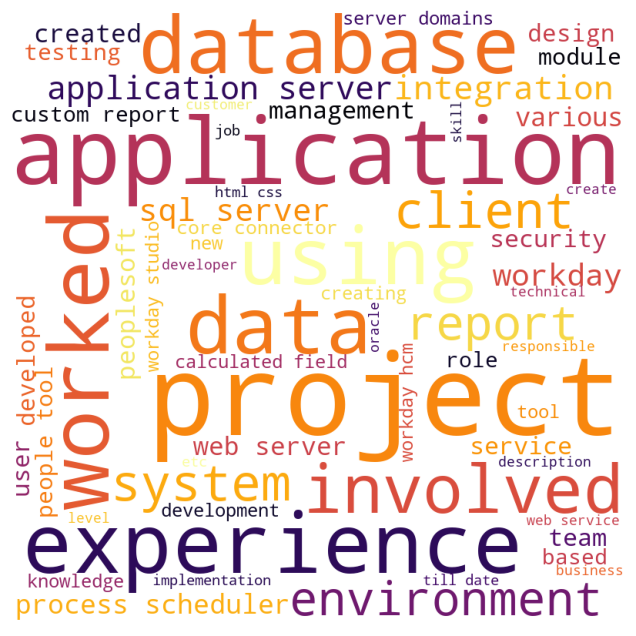

In [40]:
# Generate wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='inferno', max_words=60).generate(all_resume_text)

# Visualize the wordcloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [41]:
#trying to visualise each resume lengh of word and uniuqe word into it

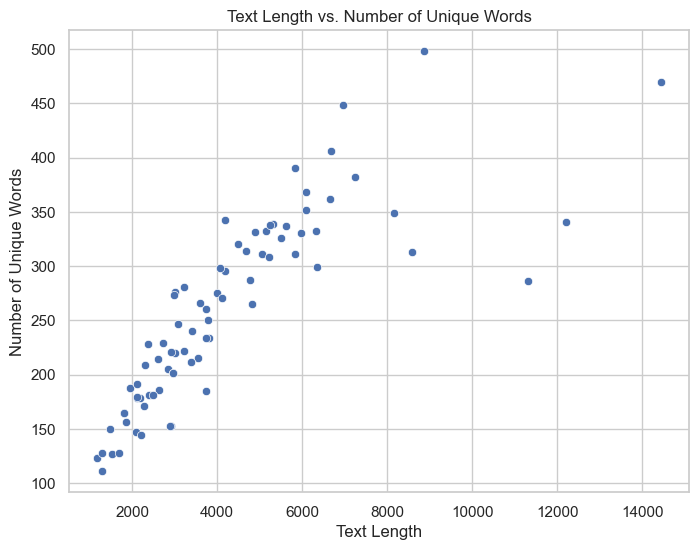

In [42]:
# Create scatter plot of the length of each text entry vs the number of unique words in that entry
df['text_length'] = df['clean_text'].apply(len)
df['unique_words'] = df['clean_text'].apply(lambda x: len(set(str(x).split())))

plt.figure(figsize=(8, 6))
sns.scatterplot(x='text_length', y='unique_words', data=df)
plt.title('Text Length vs. Number of Unique Words')
plt.xlabel('Text Length')
plt.ylabel('Number of Unique Words')
plt.show()